In [2]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot

In [3]:
import keras
from keras.datasets import cifar10

In [22]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

170500096/170498071 [==============================] - 4s 0us/step


In [7]:
print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)
print('x_test =', x_test.shape)

x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


In [8]:
# normalize the data
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [9]:
# Emcode the variables
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_valid = np_utils.to_categorical(y_valid,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [10]:
# Data Augmentation
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,
horizontal_flip=True,vertical_flip=False
)
datagen.fit(x_train)

In [11]:
# model generation
base_hidden_units=32 #Number of hidden units variable.
weight_decay=1e-4 # L2 regularization parameter lambda

In [12]:
model=Sequential()
# Conv1
model.add(Conv2D(base_hidden_units,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay),
                input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [13]:
## CONV2
model.add(Conv2D(base_hidden_units, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [14]:
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [15]:
# CONV3
# hidden units = 32*2 = 64
model.add(Conv2D(base_hidden_units * 2, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [16]:
# CONV4
model.add(Conv2D(base_hidden_units * 2, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [17]:
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

In [18]:
# CONV5
model.add(Conv2D(base_hidden_units * 4, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [19]:
# CONV6
model.add(Conv2D(base_hidden_units * 4, kernel_size= 3, padding='same',
kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [20]:
# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [21]:
# FC7
model.add(Flatten())
model.add(Dense(10, activation='softmax')) # dataset has 10 labels
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [24]:
batch_size = 128
epochs = 50
checkpointer = ModelCheckpoint(filepath='model.50epochs.hdf5', verbose=1,save_best_only=True )
optimizer = keras.optimizers.Adam(lr=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size), callbacks=[checkpointer],steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs,
verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/50

Epoch 00001: val_loss improved from inf to 1.58001, saving model to model.50epochs.hdf5
351/351 - 21s - loss: 2.3105 - accuracy: 0.3296 - val_loss: 1.5800 - val_accuracy: 0.4534
Epoch 2/50

Epoch 00002: val_loss improved from 1.58001 to 1.47608, saving model to model.50epochs.hdf5
351/351 - 21s - loss: 1.9267 - accuracy: 0.3921 - val_loss: 1.4761 - val_accuracy: 0.4820
Epoch 3/50

Epoch 00003: val_loss did not improve from 1.47608
351/351 - 20s - loss: 1.7390 - accuracy: 0.4346 - val_loss: 1.4864 - val_accuracy: 0.4834
Epoch 4/50

Epoch 00004: val_loss did not improve from 1.47608
351/351 - 21s - loss: 1.6323 - accuracy: 0.4695 - val_loss: 1.5419 - val_accuracy: 0.4840
Epoch 5/50

Epoch 00005: val_loss improved from 1.47608 to 1.42720, saving model to model.50epochs.hdf5
351/351 - 21s - loss: 1.5465 - accuracy: 0.4996 - val_loss: 1.4272 - val_accuracy: 0.5096
Epoch 6/50

Epoch 00006: val_loss improved from 1.42720 to 1.30159, saving model to model.50epochs.hdf5
351/351 - 21

In [27]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 7ms/step - loss: 0.6810 - accuracy: 0.7891

Test result: 78.910 loss: 0.681


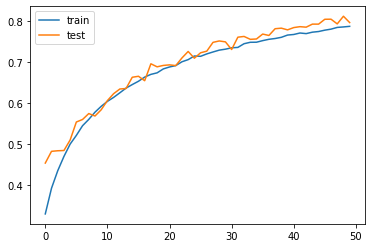

In [30]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [25]:
model.save('model1.h5')

In [26]:
from google.colab import files
files.download("model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>